In [8]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("wdbc.data", header = None)

In [9]:
#change column label from numerical index to these labels

column_labels = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error',
'fractal dimension error', 'worst radius', 'worst texture',
'worst perimeter', 'worst area', 'worst smoothness',
'worst compactness', 'worst concavity', 'worst concave points',
'worst symmetry', 'worst fractal dimension']

df.columns = column_labels

In [10]:
#change the labeling in 'diagnosis'

df.diagnosis.unique() #confirm that there are only B and M labels

df['diagnosis'].replace("B", 'Benign', inplace = True)
df['diagnosis'].replace('M', 'Malignant', inplace = True)

In [11]:
#split our data into feature vectors and labels

feature_df = df.iloc[:, 2:] #exclude the first row - patient_id

label_df = df.iloc[:,1]

In [12]:
#standardize the feature vectors

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(feature_df) #mean = 0, std = 1

In [13]:
#use PCA for dimension reduction of the feature vectors

from sklearn.decomposition import PCA

#we can put in the number of components we want returned - 

pca_breast = PCA(n_components = 2) #assign 2 components to the PCA

principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_df = pd.DataFrame(data = principalComponents_breast, columns = ['PC1', 'PC2'])

In [14]:
#check how much of the variance is covered by 2 components
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

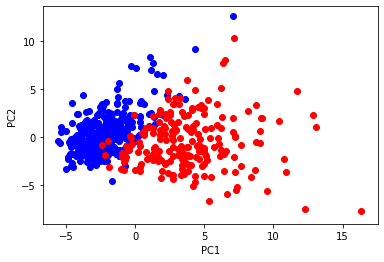

In [15]:
#plot a graph of how the 2 components from the PCA show the cancer's diagnosis
plt.figure()

plt.xlabel('PC1')
plt.ylabel('PC2')
targets = ['Benign', 'Malignant']
colors = ['b', 'r']

for target, color in zip(targets, colors):
    indeciesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indeciesToKeep, 'PC1'], 
                principal_breast_df.loc[indeciesToKeep, 'PC2'], 
                c = color)

In [16]:
#calculate all 30 PCA and how much they cover
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_ #find the variance of all the 30 feature vectors
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.4427
 1: 0.1897
 2: 0.0939
 3: 0.0660
 4: 0.0550
 5: 0.0402
 6: 0.0225
 7: 0.0159
 8: 0.0139
 9: 0.0117
10: 0.0098
11: 0.0087
12: 0.0080
13: 0.0052
14: 0.0031
15: 0.0027
16: 0.0020
17: 0.0018
18: 0.0016
19: 0.0010
20: 0.0010
21: 0.0009
22: 0.0008
23: 0.0006
24: 0.0005
25: 0.0003
26: 0.0002
27: 0.0001
28: 0.0000
29: 0.0000


In [15]:
#check variance ratio: should be close to 1
sum(evr)

1.0000000000000002

Text(0.5, 0, 'Number of components')

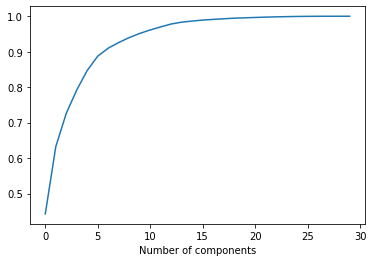

In [16]:
#plot the 30 PCA

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')